In [1]:
import pyxdf
import numpy as np
from utils import sync_streams, combine_streams

Group 2:

Task Begin: Immediately after Chris says "Begin"
Task End: Immediately before Chris says "Alright, yall forgot"

CSL_Laptop
Start OBS Vid  UNIX timestamp: 1727877264.624
Task Beginning UNIX timestamp: 1727877596.691 (331 sec in)
Task End       UNIX timestamp: 1727881210.124 (3945 sec in)

HCI_Lab1
Start OBS Vid  UNIX timestamp: 1727877407.049
Task Beginning UNIX timestamp: 1727877595.516 (188 sec in)

HCI_Lab2
Start OBS Vid  UNIX timestamp: 1727877452.637
Task Beginning UNIX timestamp: 1727877616.551 (163 sec in)

In [2]:
group_num = 2
WPI_xdf_path = f"../Group {group_num}/HCILab1-Group2.xdf"
CSL_xdf_path = f"../Group {group_num}/CSL_02_10.xdf"
WPI_data_streams, WPI_header = pyxdf.load_xdf(WPI_xdf_path)
CSL_data_streams, CSL_header = pyxdf.load_xdf(CSL_xdf_path)
video_start_UNIX_times = {
    "OBS_HCILab1": 1727877407.049,
    "OBS_HCILab2": 1727877452.637,
    "OBS_CSL_Laptop": 1727877264.624
}
task_start_UNIX_times = {
    "OBS_HCILab1": 1727877595.516,
    "OBS_HCILab2": 1727877616.551,
    "OBS_CSL_Laptop": 1727877596.691
}
task_duration = 1727881210.124 - 1727877596.691
task_duration

Stream 2: Calculated effective sampling rate 16.8061 Hz is different from specified rate 30.0000 Hz.


3613.433000087738

In [3]:
# Sync the streams based on the shared stream's timestamp
streams = sync_streams(WPI_data_streams, CSL_data_streams, video_start_UNIX_times, task_start_UNIX_times, task_duration)

length of EEG stream: 1016551
start_EEG_index: 51709, end_EEG_index: 955067
padded_start_EEG_index: 42709, padded_end_EEG_index: 964067
actual end EEG index: 912358
For EEG Stream Unicorn_HCILab1, start cutoff index is 9000 and end cutoff index is 912358

length of EEG stream: 995082
start_EEG_index: 107765, end_EEG_index: 1011123
padded_start_EEG_index: 98765, padded_end_EEG_index: 1020123
actual end EEG index: 896317
[cut short] For EEG Stream Unicorn_HCILab2, start cutoff index is 9000 and end cutoff index is 896317

length of EEG stream: 1027149
start_EEG_index: 81764, end_EEG_index: 985122
padded_start_EEG_index: 72764, padded_end_EEG_index: 994122
actual end EEG index: 912358
For EEG Stream Unicorn_CSL_Laptop, start cutoff index is 9000 and end cutoff index is 912358



In [4]:
# manually sync Stream Unicorn_CSL_LabPC for Group 1 and 2
Unicorn_CSL_LabPC_stream = streams["Unicorn_CSL_LabPC"]
OG_EEG_stream_len = len(streams["Unicorn_CSL_LabPC"])

# calculated by: after Unicorn_CSL_Laptop stream starting time stamp - (diff between before Unicorn_CSL_Laptop stream starting time stamp and before Unicorn_CSL_LabPC stream starting time stamp)
start_cutoff_timestamp = 4944562.554853356 - (4944235.589834545 - 4944236.498566027)
start_cutoff_index = np.searchsorted(Unicorn_CSL_LabPC_stream["time_stamps"], start_cutoff_timestamp)

print("start_cutoff_index: " + str(start_cutoff_index))

end_cutoff_index = start_cutoff_index + round(250 * task_duration)
padded_start_cutoff_index = start_cutoff_index - 9000
padded_end_cutoff_index = end_cutoff_index + 9000

start_cut_off_index = 9000
if padded_start_cutoff_index < 0:
    padded_start_cutoff_index = 0
    start_cut_off_index = start_cutoff_index

Unicorn_CSL_LabPC_stream["time_stamps"] = Unicorn_CSL_LabPC_stream["time_stamps"][padded_start_cutoff_index:padded_end_cutoff_index]
Unicorn_CSL_LabPC_stream["time_series"] = Unicorn_CSL_LabPC_stream["time_series"][padded_start_cutoff_index:padded_end_cutoff_index]

if end_cutoff_index >= OG_EEG_stream_len:
    print("[cut short] For EEG Stream Unicorn_CSL_LabPC, start cutoff index is " + str(start_cut_off_index) + " and end cutoff index is " + str(len(Unicorn_CSL_LabPC_stream["time_series"])))
else:
    print("For EEG Stream Unicorn_CSL_LabPC, start cutoff index is " + str(start_cut_off_index) + " and end cutoff index is " + str(end_cutoff_index - padded_start_cutoff_index))

start_cutoff_index: 81774
[cut short] For EEG Stream Unicorn_CSL_LabPC, start cutoff index is 9000 and end cutoff index is 921358


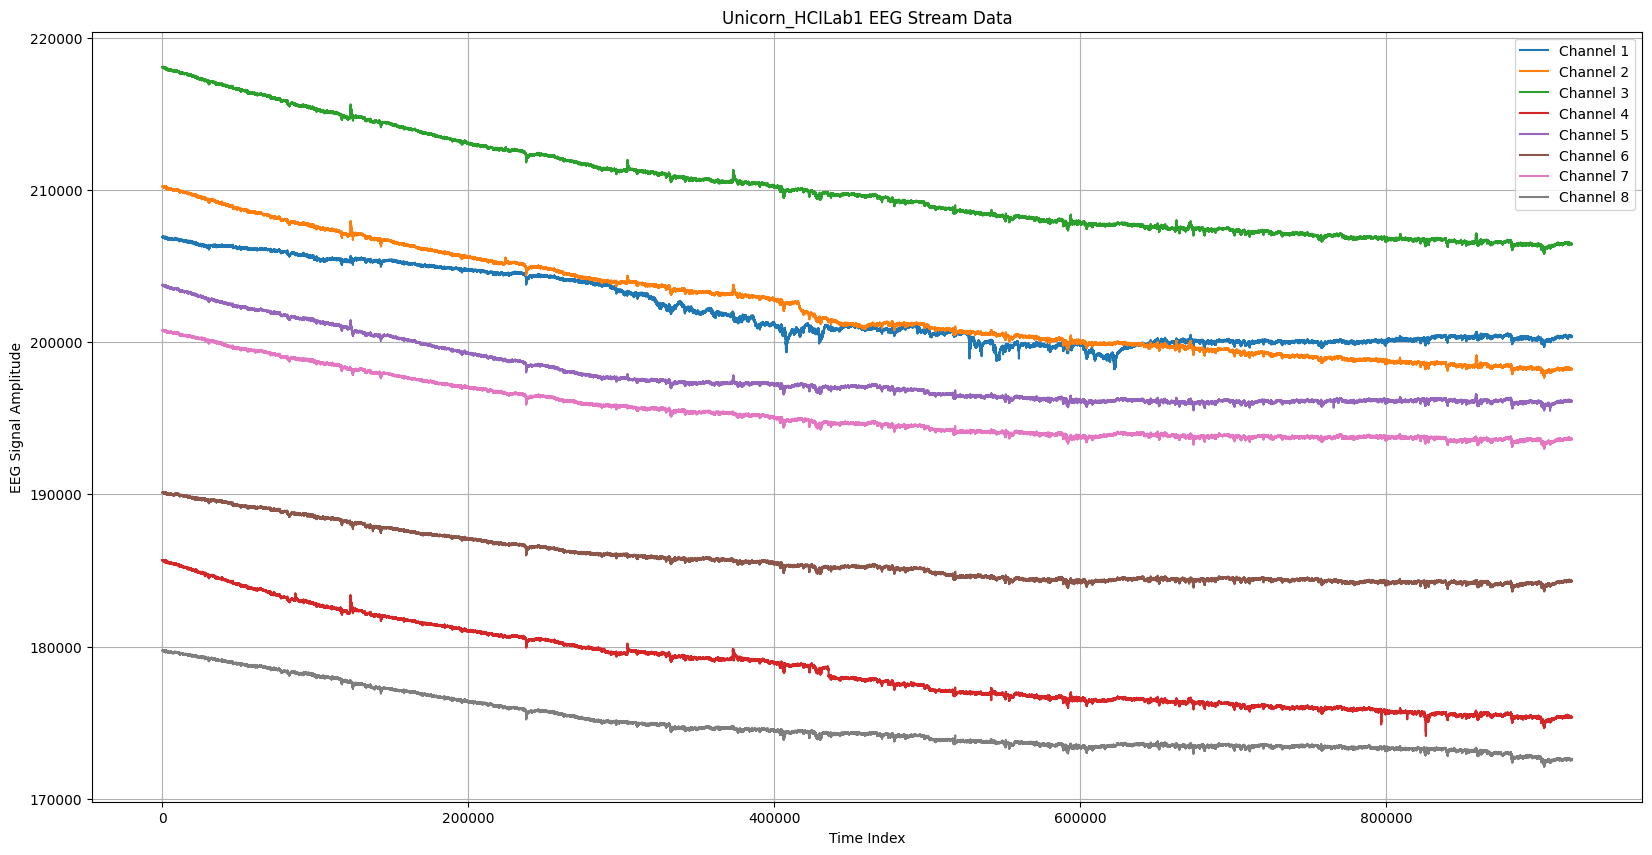

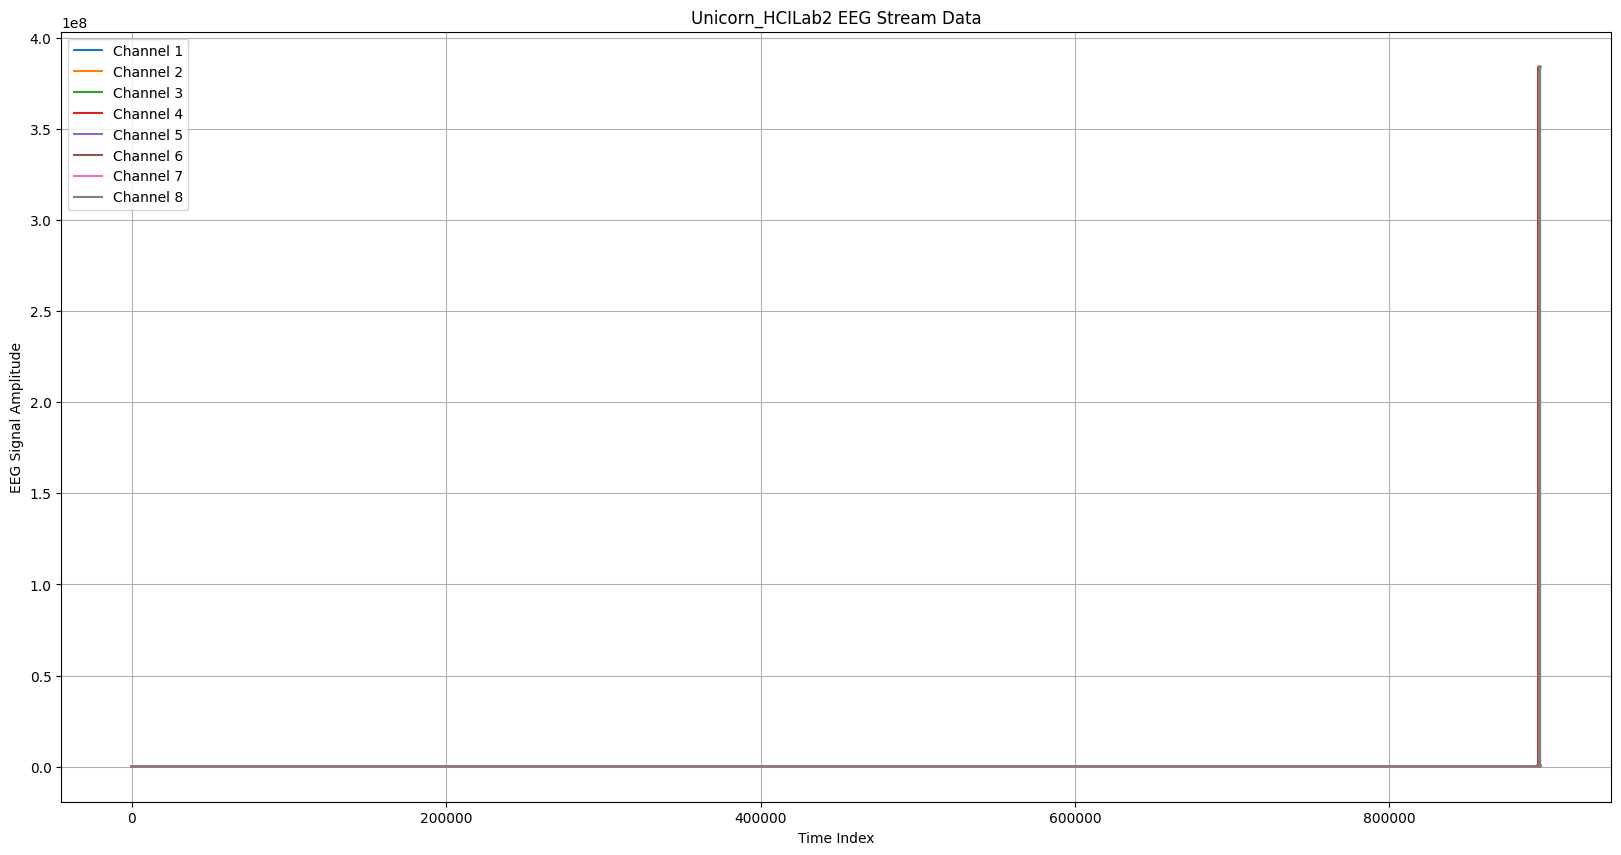

/Users/henryhuang/3rd Year/research/brain-hci/EEG-sync/virtual_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


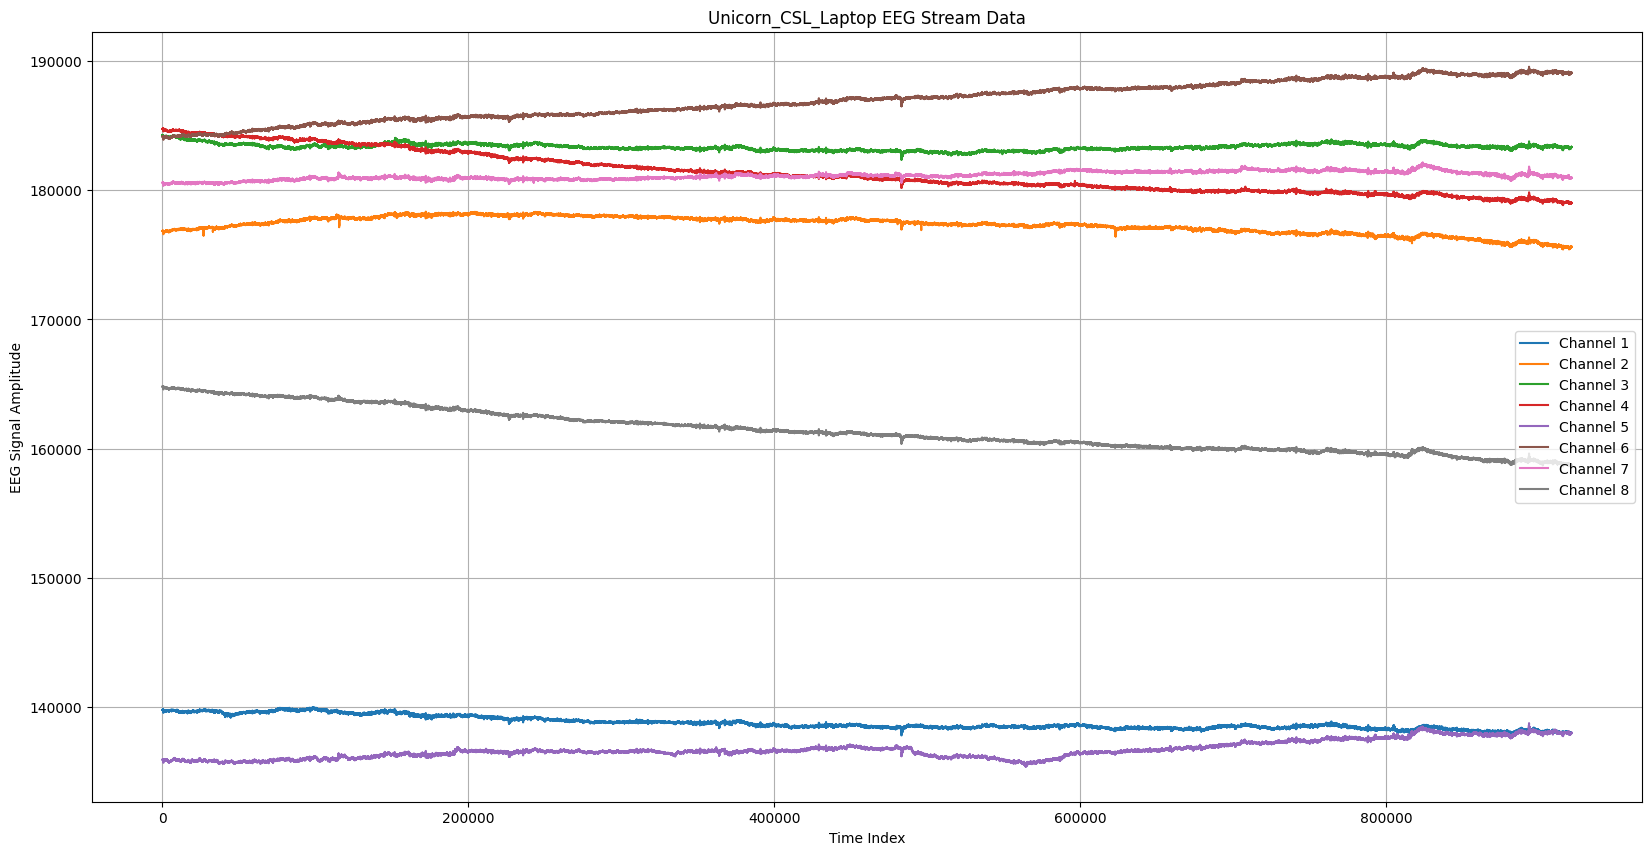

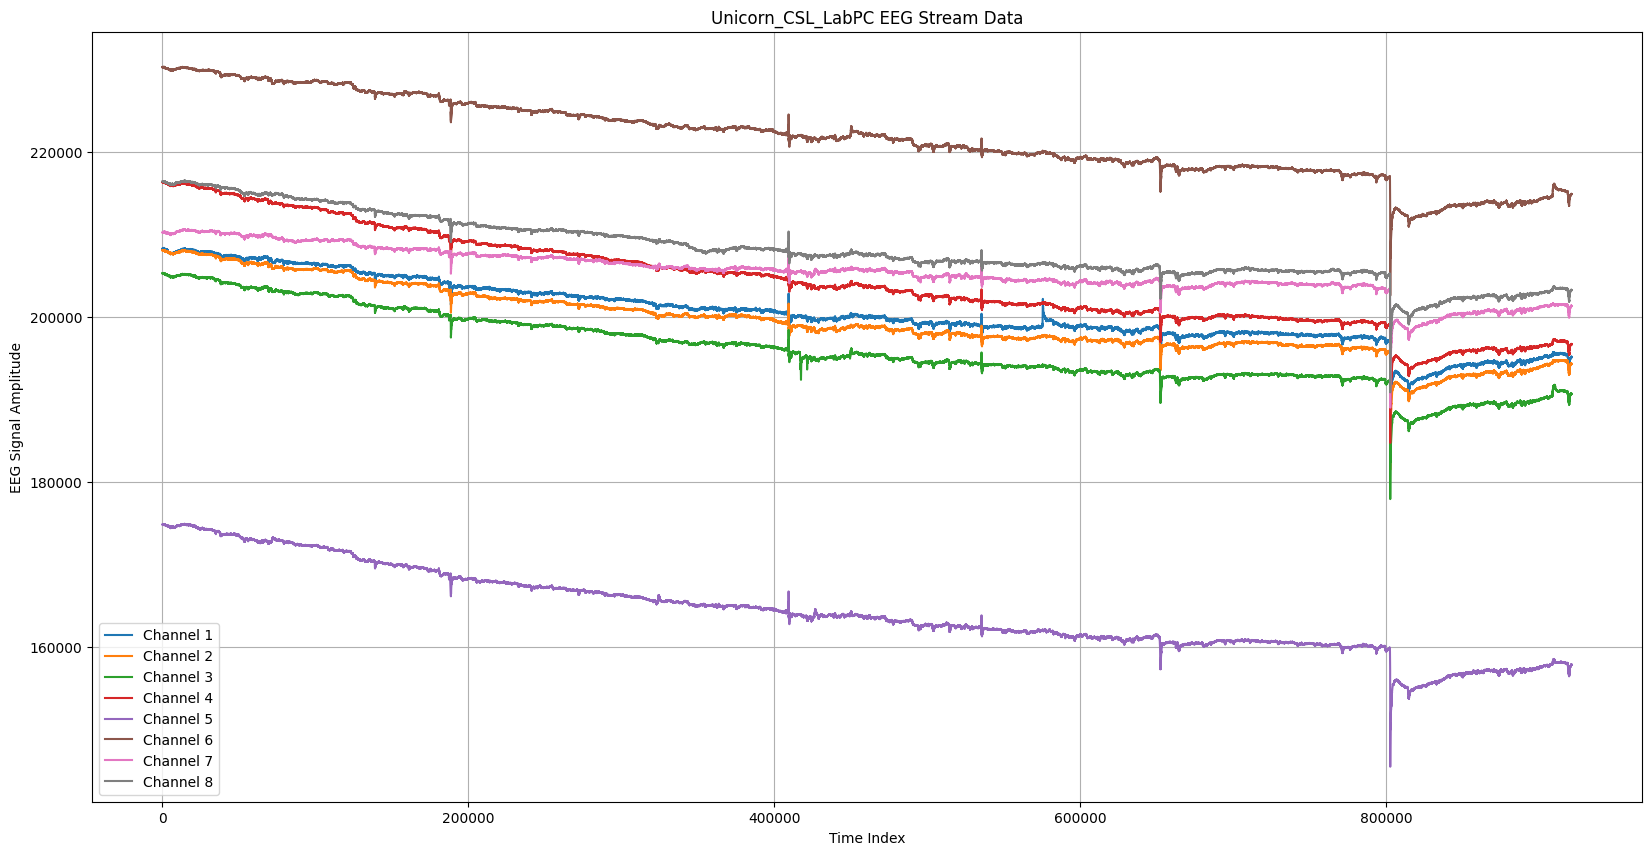

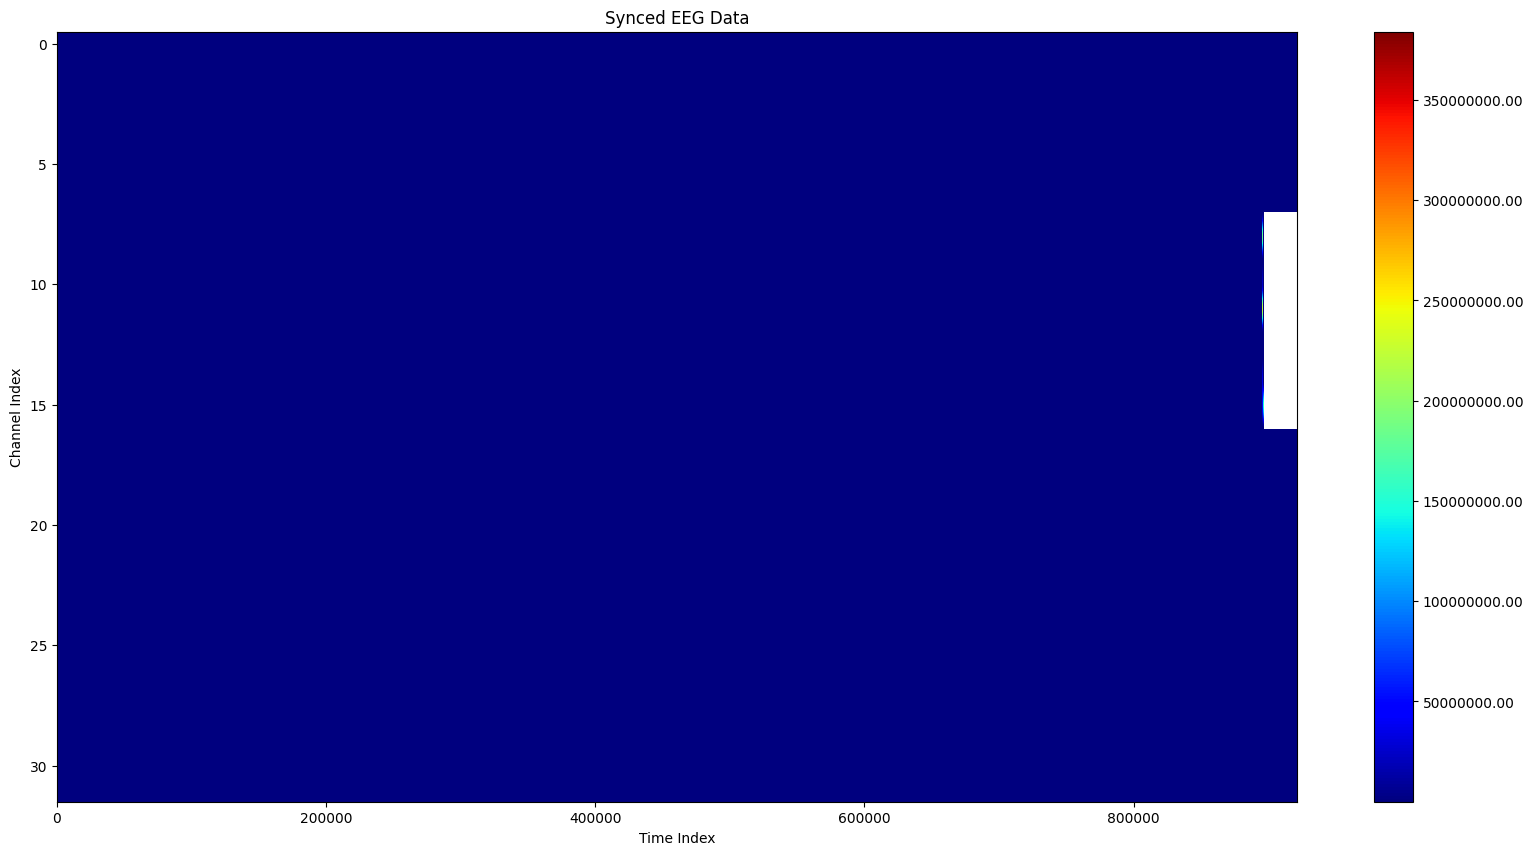

Min: 570.41650390625
Max: 383999744.0
Mean: 202425.25090651854
Standard Deviation: 3141679.4214572776


In [5]:
combine_streams(group_num, streams)